# Matrix Multiplication

This notebook has been translated from this [ImageJ Macro](https://clij.github.io/clij2-docs/md/matrix_multiply/)

It demonstrate how to perform matrix operations.

In [1]:
import pyclesperanto as cle

from skimage.io import imread, imsave, imshow
import matplotlib
import numpy as np

cle.select_device() # default initialization

(OpenCL) NVIDIA GeForce RTX 4090 (OpenCL 3.0 CUDA)
	Vendor:                      NVIDIA Corporation
	Driver Version:              535.216.01
	Device Type:                 GPU
	Compute Units:               128
	Global Memory Size:          24217 MB
	Maximum Object Size:         6054 MB
	Max Clock Frequency:         2625 MHz
	Image Support:               Yes

## Define two arrays (vectors) and push them to the GPU

In [2]:
array1 = np.asarray([1, 2, 3, 4, 5])
array2 = np.asarray([6, 7, 8, 9, 10])

vector1 = cle.push(array1)
vector2 = cle.push(array2)

## In order to multiplicate matrices, the input matrices must be of size (n * m) and (m * n)
Therefore, we transpose one of our vectors:

In [3]:
vector1_t = cle.transpose_xy(vector1)

print("Vector 1 (transposed): " + str(vector1_t))
print("Vector 2: " + str(vector2))

Vector 1 (transposed): [[1]
 [2]
 [3]
 [4]
 [5]]
Vector 2: [ 6  7  8  9 10]


In [4]:
matrix = cle.multiply_matrix(vector1_t, vector2)

print(matrix)

[[ 6.  7.  8.  9. 10.]
 [12. 14. 16. 18. 20.]
 [18. 21. 24. 27. 30.]
 [24. 28. 32. 36. 40.]
 [30. 35. 40. 45. 50.]]


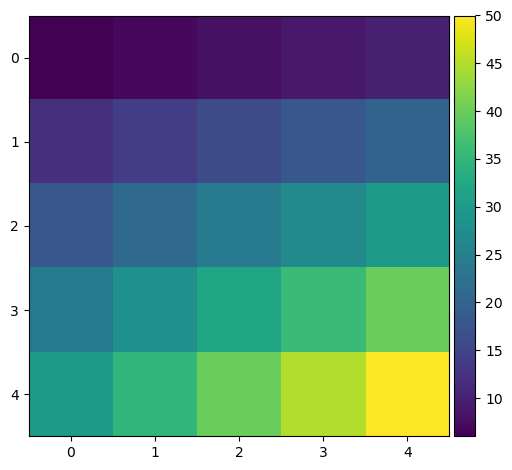

In [7]:
imshow(matrix)

## Element by element multiplication of two matrices

[[ 3.6183352   5.6195955   0.8313345   7.6066008   4.564971  ]
 [ 5.7107153  10.184905    0.35212046 16.621416    6.2459846 ]
 [17.005457   13.701829   11.364849   22.252129   15.350506  ]
 [17.96373    22.812439   26.72819    32.82606    23.432129  ]
 [16.228424    5.765978   14.28232    30.3735     19.25519   ]]


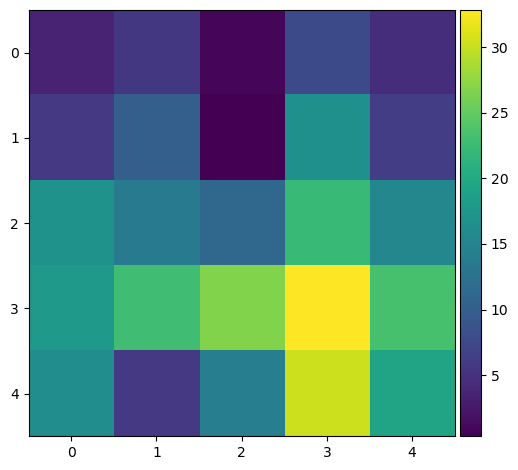

In [9]:
# generate another matrix of the same size with random values
another_matrix = cle.push(np.random.random(matrix.shape))

# element by element multiplication
matrix_element_wise_multiplied = cle.multiply_images(matrix, another_matrix)

print(matrix_element_wise_multiplied)

imshow(matrix_element_wise_multiplied)

## Element by element multiplication of a matrix with a scalar

In [10]:
elements_times_2 = cle.multiply_image_and_scalar(matrix, scalar=2)
print(elements_times_2)

[[ 12.  14.  16.  18.  20.]
 [ 24.  28.  32.  36.  40.]
 [ 36.  42.  48.  54.  60.]
 [ 48.  56.  64.  72.  80.]
 [ 60.  70.  80.  90. 100.]]
